In [2]:
!pip install pandas plotly

  Using cached plotly-6.5.2-py3-none-any.whl.metadata (8.5 kB)
Using cached plotly-6.5.2-py3-none-any.whl (9.9 MB)


In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

## Explore Electricity Data

In [5]:
# load in data
electricity = pd.read_csv("data/combined_electricity_data.csv")

In [6]:
electricity.head

<bound method NDFrame.head of      state  year       sector  electricity_usage
0       AK  1990   Commercial            1972116
1       AK  1990   Industrial             459282
2       AK  1990  Residential            1661311
3       AK  1991   Commercial            2005247
4       AK  1991   Industrial             465878
...    ...   ...          ...                ...
5350    WY  2023   Industrial            8796321
5351    WY  2023  Residential            2947863
5352    WY  2024   Commercial            5274652
5353    WY  2024   Industrial            8974198
5354    WY  2024  Residential            2968051

[5355 rows x 4 columns]>

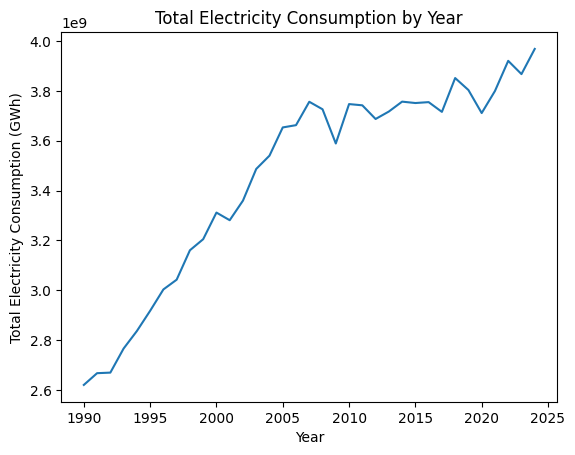

In [7]:
# Group by year and sum consumption
yearly = electricity.groupby("year")["electricity_usage"].sum()

# Plot time series
plt.figure()
yearly.plot()
plt.xlabel("Year")
plt.ylabel("Total Electricity Consumption (GWh)")
plt.title("Total Electricity Consumption by Year")
plt.show()

In [9]:
state_sum = electricity.groupby("state", as_index=False)["electricity_usage"].sum()

fig = px.choropleth(
    state_sum,
    locations="state",                # column with state codes
    locationmode="USA-states",        # tells plotly these are US state abbreviations
    color="electricity_usage",        # values to color by
    scope="usa",                      # restrict to USA map
    color_continuous_scale="Reds"     # change color scale if you like
)

fig.update_layout(
    title="Electricity Usage by State",
    coloraxis_colorbar_title="Usage"
)

fig.show()

## Explore Water Data

In [10]:
# load in data
water = pd.read_csv("data/combined_water_data.csv")
water.head

<bound method NDFrame.head of               State  Year   Water_Usage
0           Alabama  2000   6609.354078
1           Arizona  2000   9260.831460
2          Arkansas  2000   4346.423129
3        California  2000  48897.844434
4          Colorado  2000   7412.169063
...             ...   ...           ...
1003       Virginia  2020  16021.525723
1004     Washington  2020   8778.176229
1005  West Virginia  2020   1812.928432
1006      Wisconsin  2020   5365.865204
1007        Wyoming  2020   1015.223518

[1008 rows x 3 columns]>

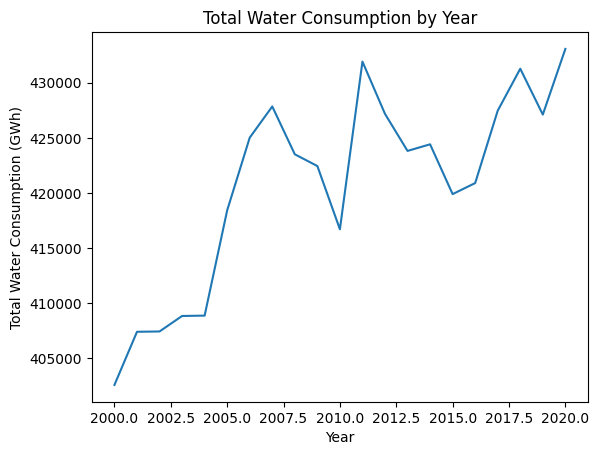

In [11]:
# Group by year and sum consumption
yearly = water.groupby("Year")["Water_Usage"].sum()

# Plot time series
plt.figure()
yearly.plot()
plt.xlabel("Year")
plt.ylabel("Total Water Consumption (GWh)")
plt.title("Total Water Consumption by Year")
plt.show()

In [ ]:
us_state_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}

water_state_sum = water.groupby("State", as_index=False)["Water_Usage"].sum()
water["state_code"] = water["State"].map(us_state_abbrev)

In [21]:
fig = px.choropleth(
    water_state_sum,
    locations="state_code",                # column with state codes
    locationmode="USA-states",        # tells plotly these are US state abbreviations
    color="Water_Usage",        # values to color by
    scope="usa",                      # restrict to USA map
    color_continuous_scale="Reds"     # change color scale if you like
)

fig.update_layout(
    title="Water Usage by State",
    coloraxis_colorbar_title="Usage"
)

fig.show()

## Explore Data Center Construction

In [22]:
construction = pd.read_csv("data/construction_data.csv")
construction.columns

Index(['state_code', 'asof_month', 'asof_month_yyyy_mm',
       'q_under_construction_facilities', 's_under_construction_power_mw',
       's_under_construction_square_footage', 'q_announcements',
       's_announcements_power_capacity', 's_announcements_square_footage',
       'q_activations', 's_activations_power_capacity',
       's_activations_square_footage', 'updated_at', 'Unnamed: 13'],
      dtype='object')

In [23]:
construction["asof_month_yyyy_mm"].head

<bound method NDFrame.head of 0        1/1/26
1        1/1/26
2        1/1/26
3        1/1/26
4        1/1/26
         ...   
3045    10/1/24
3046    11/1/24
3047     2/1/25
3048     3/1/24
3049     1/1/22
Name: asof_month_yyyy_mm, Length: 3050, dtype: object>

In [24]:
# cast asof_month_yyyy_mm to year 
construction["year"] = pd.to_datetime(
    construction["asof_month_yyyy_mm"],
    format="%m/%d/%y"
).dt.year

construction["year"].head

<bound method NDFrame.head of 0       2026
1       2026
2       2026
3       2026
4       2026
        ... 
3045    2024
3046    2024
3047    2025
3048    2024
3049    2022
Name: year, Length: 3050, dtype: int32>

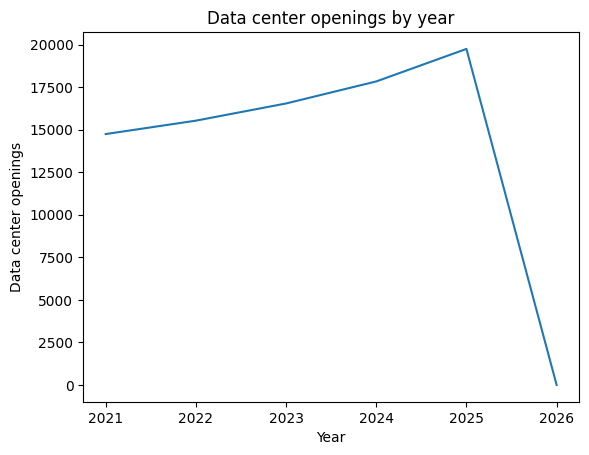

In [25]:
# Group by year and sum consumption
yearly = construction.groupby("year")["q_activations"].sum()

# Plot time series
plt.figure()
yearly.plot()
plt.xlabel("Year")
plt.ylabel("Data center openings")
plt.title("Data center openings by year")
plt.show()

In [26]:
state_con_sum = construction.groupby("state_code", as_index=False)["q_activations"].sum()

fig = px.choropleth(
    state_con_sum,
    locations="state_code",                # column with state codes
    locationmode="USA-states",        # tells plotly these are US state abbreviations
    color="q_activations",        # values to color by
    scope="usa",                      # restrict to USA map
    color_continuous_scale="Reds"     # change color scale if you like
)

fig.update_layout(
    title="Data Center Constructions by State",
    coloraxis_colorbar_title="Active"
)

fig.show()